# Lecture 9 - Motor Control
### Introduction to modeling and simulation of human movement
https://github.com/BMClab/bmc/blob/master/courses/ModSim2018.md

* In class:

In [1]:
import numpy as np
#import pandas as pd
#import pylab as pl
import matplotlib.pyplot as plt
import math

%matplotlib notebook

### Muscle properties

In [2]:
Lslack = .223
Umax = .04
Lce_o = .093 #optmal l
width = .63*Lce_o
Fmax = 7400
a = .25*Fmax
b = .25*10*Lce_o

### Initial conditions

In [3]:
Lce = .087
t0 = 0
tf = 2.99
h = 1e-3

In [4]:
t = np.arange(t0,tf,h)
F = np.empty(t.shape)
Fkpe = np.empty(t.shape)

## Simulation - Series

In [ ]:
for i in range (len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.31
    elif t[i]>1 and t[i]<2:
        Lm = .31 - .04*(t[i]-1)
        #print(Lm)
    
    #shortening at 4cm/s
    Lsee = Lm - Lce
    
    if Lsee<Lslack: 
        F[i] = 0
    else: 
        F[i] = Fmax*((Lsee-Lslack)/(Umax*Lslack))**2
        
        
    #isometric force at Lce from CE force length relationship
    F0 = max([0, Fmax*(1-((Lce-Lce_o)/width)**2)])
    
    #calculate CE velocity from Hill's equation
    if  F[i]>F0: print('Error: cannot do eccentric contractions')
    
    Lcedot = -b*(F0-F[i])/(F[i]+a) #vel is negative for shortening
    
    # --- Euler integration step
    Lce += h*Lcedot

    

## Simulation - Parallel

In [5]:
for i in range (len(t)):
    #ramp
    if t[i]<=1:
        Lm = 0.31
    elif t[i]>1 and t[i]<2:
        Lm = .31 + .04*(t[i]-1)
        #print(Lm)
    
    #shortening at 4cm/s
    Lsee = Lm - Lce
    
    if Lsee<Lslack: 
        F[i] = 0
    else: 
        F[i] = Fmax*((Lsee-Lslack)/(Umax*Lslack))**2
    
    
    if Lce<Lce_o: 
        Fkpe[i] = 0
    else: 
        Fkpe[i] = Fmax*((Lce-Lce_o)/(Umax*Lce_o))**2
        
        
    #isometric force at Lce from CE force length relationship
    F0 = max([0, Fmax*(1-((Lce-Lce_o)/width)**2)])
    
    #calculate CE velocity from Hill's equation
    if  F[i]>F0: print('Error: cannot do eccentric contractions')
    
    Lcedot = -b*(F0-F[i])/(F[i]+a+Fkpe[i]) #vel is negative for shortening
    
    # --- Euler integration step
    Lce += h*Lcedot

    

Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions
Error: cannot do eccentric contractions


## Plot 

<IPython.core.display.Javascript object>


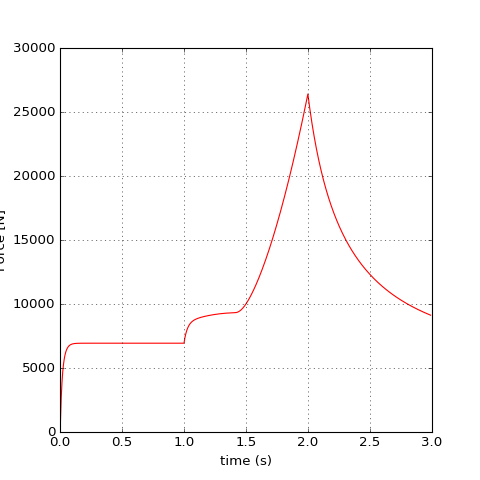

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6,6), sharex=True)

ax.plot(t,F,c='red')
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('Force [N]')


#ax.legend()